In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
maxpow = 10
number = 200
file =f'./../data/results/circuit_params_maxpow_{maxpow}_number_{number}.csv'
df = pd.read_csv(file)

In [3]:
m = df['Biprime'].values
n_qubits = df['Number of Qubits'].values
n_cnots = df['Number of CNOTs'].values

In [4]:
log_m = np.log2(m)
log_log_m = np.log2(log_m)
log_n_qubits = np.log2(n_qubits)
log_n_cnots = np.log2(n_cnots)

In [5]:
# Create linear regression objects
reg_qubits = LinearRegression()
reg_cnots = LinearRegression()

# Fit the models
reg_qubits.fit(log_log_m.reshape(-1, 1), log_n_qubits)
reg_cnots.fit(log_log_m.reshape(-1, 1), log_n_cnots)

# Predict values using the models
pred_n_qubits = reg_qubits.predict(log_log_m.reshape(-1, 1))
pred_n_cnots = reg_cnots.predict(log_log_m.reshape(-1, 1))

In [6]:
# Print out the coefficients of the linear regression models
print("Linear Fit Results:")
print("Number of Qubits:")
print(f"Intercept: {reg_qubits.intercept_}")
print(f"Coefficient: {reg_qubits.coef_[0]}")
print("Number of CNOTs:")
print(f"Intercept: {reg_cnots.intercept_}")
print(f"Coefficient: {reg_cnots.coef_[0]}")

Linear Fit Results:
Number of Qubits:
Intercept: -0.5294286632780212
Coefficient: 1.5427268497116087
Number of CNOTs:
Intercept: -0.7311772306420892
Coefficient: 2.6933502129100337


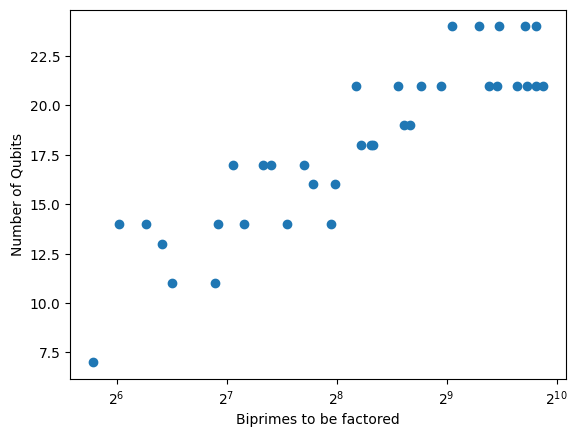

In [7]:
plot_name = f"./../data/plots/biprimes_n_qubits_max_power_{maxpow}_plot.pdf"
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(m, n_qubits, marker="o")

ax.set_ylabel("Number of Qubits")
ax.set_xlabel("Biprimes to be factored")
ax.set_xscale("log", base=2)

plt.savefig(plot_name)
plt.show()

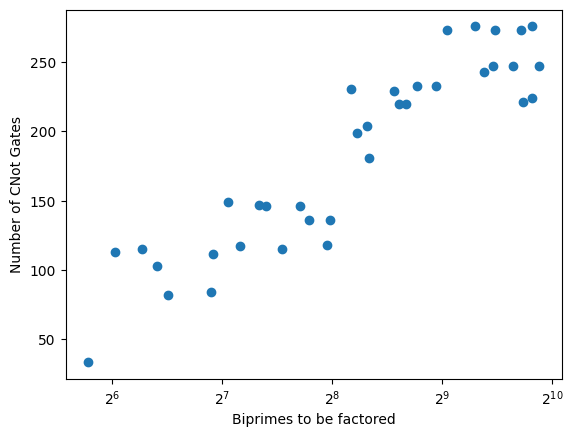

In [8]:
plot_name = f"./../data/plots/biprimes_n_cnots_max_power_{maxpow}_plot.pdf"
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(m, n_cnots, marker="o")

ax.set_ylabel("Number of CNot Gates")
ax.set_xlabel("Biprimes to be factored")
ax.set_xscale("log", base=2)

plt.savefig(plot_name)
plt.show()

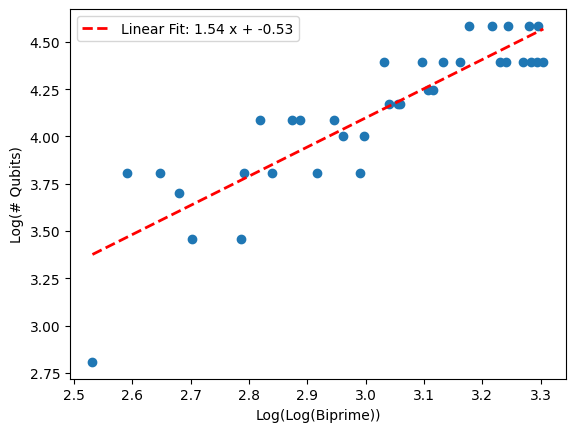

In [9]:
plot_name = f"./../data/plots/log_log_biprimes_log_n_qubits_max_power_{maxpow}_plot.pdf"
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

a = np.round(reg_qubits.coef_[0], 2)
b = np.round(reg_qubits.intercept_, 2)

ax.scatter(log_log_m, log_n_qubits, marker="o")
plt.plot(log_log_m, pred_n_qubits,'--', color='red', linewidth=2, label=f'Linear Fit: {a} x + {b}')

ax.set_ylabel("Log(# Qubits)")
ax.set_xlabel("Log(Log(Biprime))")

plt.savefig(plot_name)
plt.legend()
plt.show()

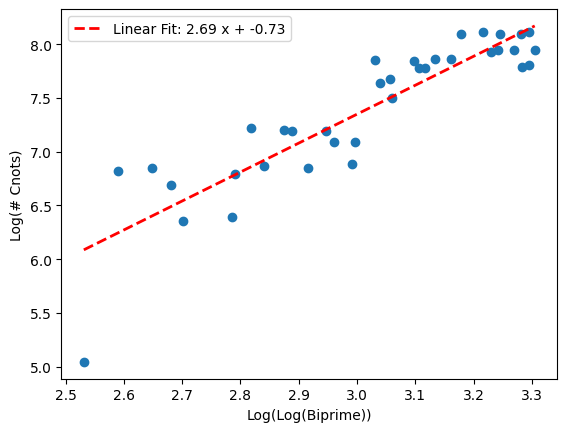

In [10]:
plot_name = f"./../data/plots/log_log_biprimes_log_n_cnots_max_power_{maxpow}_plot.pdf"
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

a = np.round(reg_cnots.coef_[0], 2)
b = np.round(reg_cnots.intercept_, 2)

ax.scatter(log_log_m, log_n_cnots, marker="o")
plt.plot(log_log_m, pred_n_cnots,'--', color='red', linewidth=2, label=f'Linear Fit: {a} x + {b}')

ax.set_ylabel("Log(# Cnots)")
ax.set_xlabel("Log(Log(Biprime))")

plt.legend()
plt.savefig(plot_name)
plt.show()